# <center>MountainCar Reinforcement learning   

In [1]:
import gym
import numpy as np
import matplotlib.pyplot as plt

In [2]:
env = gym.make("MountainCar-v0")

__States, the actions and the size of the Q-table :__

In [12]:
DISCRETE_OS_SIZE = [20, 20]
DISCRETE_OS_SIZE = [20] * len(env.observation_space.high) #observation_space
discrete_os_win_size = (env.observation_space.high - env.observation_space.low)/DISCRETE_OS_SIZE

## Q-table
q_table = np.random.uniform(low=-2, high=0, size=(DISCRETE_OS_SIZE + [env.action_space.n]))

print("Qtable size : ",q_table.shape)

Qtable size :  (20, 20, 3)


In [4]:
print("Action Size : ",env.action_space.n)
print("State size : ",len(q_table))
print("High Values: ",env.observation_space.high)
print("Low values: ",env.observation_space.low)

Action Size :  3
State size :  20
High Values:  [0.6  0.07]
Low values:  [-1.2  -0.07]


In [16]:
def get_discrete_state(state):
    discrete_state = (state - env.observation_space.low)/discrete_os_win_size
    return tuple(discrete_state.astype(np.int))

#Tuple to look up the 3 Q values for the available actions in the q-table

### 1. Model using baseline parameters.

In [17]:
# objective is to get the cart to the flag.
# for now, let's just move randomly:
ep_rewards = []
aggr_ep_rewards = {'ep': [], 'avg': [], 'max': [], 'min': []}

EPISODES = 5001
LEARNING_RATE = 0.7 #aplha
DISCOUNT = 0.8 #gamma

# Exploration settings
epsilon = 1  # not a constant, qoing to be decayed
epsilon_decay_value = 0.01

START_EPSILON_DECAYING = 1
END_EPSILON_DECAYING = EPISODES//2

SHOW_EVERY = 1000
STATS_EVERY = 1000


for episode in range(EPISODES):
    episode_reward = 0
    
    discrete_state = get_discrete_state(env.reset())
    done = False

    while not done:

        if np.random.random() > epsilon: # epsilon: exploratoin rate
            # Get action from Q table
            action = np.argmax(q_table[discrete_state])
        else:
            # Get random action
            action = np.random.randint(0, env.action_space.n)


        new_state, reward, done, _ = env.step(action)
        episode_reward += reward

        new_discrete_state = get_discrete_state(new_state)

        if episode % SHOW_EVERY == 0:
            env.render()
        #new_q = (1 - LEARNING_RATE) * current_q + LEARNING_RATE * (reward + DISCOUNT * max_future_q)

        # If simulation did not end yet after last step - update Q table
        if not done:

            # Maximum possible Q value in next step (for new state)
            max_future_q = np.max(q_table[new_discrete_state])

            # Current Q value (for current state and performed action)
            current_q = q_table[discrete_state + (action,)]

            # And here's our equation for a new Q value for current state and action
            new_q = (1 - LEARNING_RATE) * current_q + LEARNING_RATE * (reward + DISCOUNT * max_future_q)

            # Update Q table with new Q value
            q_table[discrete_state + (action,)] = new_q


        # Simulation ended (for any reson) - if goal position is achived - update Q value with reward directly
        elif new_state[0] >= env.goal_position:
            #q_table[discrete_state + (action,)] = reward
            q_table[discrete_state + (action,)] = 0

        discrete_state = new_discrete_state

        
    # Decaying is being done every episode if episode number is within decaying range
    if END_EPSILON_DECAYING >= episode >= START_EPSILON_DECAYING:
        epsilon -= epsilon_decay_value
        
    ep_rewards.append(episode_reward)
    if not episode % STATS_EVERY:
        average_reward = sum(ep_rewards[-STATS_EVERY:])/STATS_EVERY
        aggr_ep_rewards['ep'].append(episode)
        aggr_ep_rewards['avg'].append(average_reward)
        aggr_ep_rewards['max'].append(max(ep_rewards[-STATS_EVERY:]))
        aggr_ep_rewards['min'].append(min(ep_rewards[-STATS_EVERY:]))
        print(f'Episode: {episode:>5d}, average reward: {average_reward:>4.1f}, current epsilon: {epsilon:>1.2f}')

env.close()

Episode:     0, average reward: -0.2, current epsilon: 1.00
Episode:  1000, average reward: -197.8, current epsilon: -9.00
Episode:  2000, average reward: -194.9, current epsilon: -19.00
Episode:  3000, average reward: -194.3, current epsilon: -24.00
Episode:  4000, average reward: -189.8, current epsilon: -24.00
Episode:  5000, average reward: -179.2, current epsilon: -24.00


In [18]:
print("Score over time: ",average_reward)

Score over time:  -179.155


__Visualization of Rewards:__

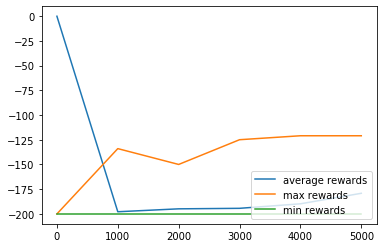

In [19]:
plt.plot(aggr_ep_rewards['ep'], aggr_ep_rewards['avg'], label="average rewards")
plt.plot(aggr_ep_rewards['ep'], aggr_ep_rewards['max'], label="max rewards")
plt.plot(aggr_ep_rewards['ep'], aggr_ep_rewards['min'], label="min rewards")
plt.legend(loc=4)
plt.show()

__Changing LEARNING RATE & DISCOUNT RATE__ (alpha & gamma) : 

In [43]:
# LEARNING_RATE= 0.1, DISCOUNT = 0.95

ep_rewards = []
aggr_ep_rewards = {'ep': [], 'avg': [], 'max': [], 'min': []}

LEARNING_RATE = 0.1
DISCOUNT = 0.95
EPISODES = 6001
SHOW_EVERY = 1000
STATS_EVERY = 1000

epsilon = 1 
START_EPSILON_DECAYING = 1
END_EPSILON_DECAYING = EPISODES//2
epsilon_decay_value = 0.01
#epsilon_decay_value = epsilon/(END_EPSILON_DECAYING - START_EPSILON_DECAYING)

for episode in range(EPISODES):
    episode_reward = 0
    discrete_state = get_discrete_state(env.reset())
    done = False

    while not done:

        if np.random.random() > epsilon: 
            action = np.argmax(q_table[discrete_state])
        else:
            action = np.random.randint(0, env.action_space.n)


        new_state, reward, done, _ = env.step(action)
        episode_reward += reward

        new_discrete_state = get_discrete_state(new_state)

        if episode % SHOW_EVERY == 0:
            env.render()
        if not done:
            max_future_q = np.max(q_table[new_discrete_state])
            current_q = q_table[discrete_state + (action,)]
            new_q = (1 - LEARNING_RATE) * current_q + LEARNING_RATE * (reward + DISCOUNT * max_future_q)
            q_table[discrete_state + (action,)] = new_q


        elif new_state[0] >= env.goal_position:
            q_table[discrete_state + (action,)] = 0

        discrete_state = new_discrete_state

        if done == True: 
            break
                
    if END_EPSILON_DECAYING >= episode >= START_EPSILON_DECAYING:
        epsilon -= epsilon_decay_value
        
    ep_rewards.append(episode_reward)
    if not episode % STATS_EVERY:
        average_reward = sum(ep_rewards[-STATS_EVERY:])/STATS_EVERY
        aggr_ep_rewards['ep'].append(episode)
        aggr_ep_rewards['avg'].append(average_reward)
        aggr_ep_rewards['max'].append(max(ep_rewards[-STATS_EVERY:]))
        aggr_ep_rewards['min'].append(min(ep_rewards[-STATS_EVERY:]))
        print(f'Episode: {episode:>5d}, average reward: {average_reward:>4.1f}, current epsilon: {epsilon:>1.2f}')

env.close()

Episode:     0, average reward: -0.2, current epsilon: 1.00
Episode:  1000, average reward: -147.3, current epsilon: -9.00
Episode:  2000, average reward: -138.0, current epsilon: -19.00
Episode:  3000, average reward: -136.8, current epsilon: -29.00
Episode:  4000, average reward: -135.9, current epsilon: -29.00
Episode:  5000, average reward: -135.8, current epsilon: -29.00
Episode:  6000, average reward: -135.8, current epsilon: -29.00


__Improved accuracy :__

In [44]:
print("Score over time: ",average_reward)

Score over time:  -135.813


__Avg reward increased From -179 to -135__ which is __22%__. 

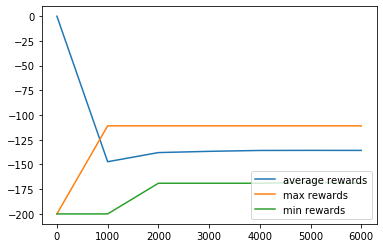

In [45]:
plt.plot(aggr_ep_rewards['ep'], aggr_ep_rewards['avg'], label="average rewards")
plt.plot(aggr_ep_rewards['ep'], aggr_ep_rewards['max'], label="max rewards")
plt.plot(aggr_ep_rewards['ep'], aggr_ep_rewards['min'], label="min rewards")
plt.legend(loc=4)
plt.show()

__Trying different value for epsilon and decay_rate :__

In [51]:
## epsilon = 2, epsilon/(END_EPSILON_DECAYING - START_EPSILON_DECAYING)

ep_rewards = []
aggr_ep_rewards = {'ep': [], 'avg': [], 'max': [], 'min': []}

LEARNING_RATE = 0.1
DISCOUNT = 0.9
EPISODES = 6001
SHOW_EVERY = 1000
STATS_EVERY = 1000


epsilon = 2 
START_EPSILON_DECAYING = 2
END_EPSILON_DECAYING = EPISODES//2
#epsilon_decay_value = 0.05
epsilon_decay_value = epsilon/(END_EPSILON_DECAYING - START_EPSILON_DECAYING)


for episode in range(EPISODES):
    episode_reward = 0
    
    discrete_state = get_discrete_state(env.reset())
    done = False


    while not done:

        if np.random.random() > epsilon:
            action = np.argmax(q_table[discrete_state])
        else:
            action = np.random.randint(0, env.action_space.n)

        new_state, reward, done, _ = env.step(action)
        episode_reward += reward

        new_discrete_state = get_discrete_state(new_state)

        if episode % SHOW_EVERY == 0:
            env.render()
        
        if not done:

            max_future_q = np.max(q_table[new_discrete_state])
            current_q = q_table[discrete_state + (action,)]
            new_q = (1 - LEARNING_RATE) * current_q + LEARNING_RATE * (reward + DISCOUNT * max_future_q)
            q_table[discrete_state + (action,)] = new_q

        elif new_state[0] >= env.goal_position:
            q_table[discrete_state + (action,)] = 0

        discrete_state = new_discrete_state

    if END_EPSILON_DECAYING >= episode >= START_EPSILON_DECAYING:
        epsilon -= epsilon_decay_value
        
        
    ep_rewards.append(episode_reward)
    if not episode % STATS_EVERY:
        average_reward = sum(ep_rewards[-STATS_EVERY:])/STATS_EVERY
        aggr_ep_rewards['ep'].append(episode)
        aggr_ep_rewards['avg'].append(average_reward)
        aggr_ep_rewards['max'].append(max(ep_rewards[-STATS_EVERY:]))
        aggr_ep_rewards['min'].append(min(ep_rewards[-STATS_EVERY:]))
        print(f'Episode: {episode:>5d}, average reward: {average_reward:>4.1f}, current epsilon: {epsilon:>1.2f}')

env.close()

Episode:     0, average reward: -0.2, current epsilon: 2.00
Episode:  1000, average reward: -200.0, current epsilon: 1.33
Episode:  2000, average reward: -200.0, current epsilon: 0.67
Episode:  3000, average reward: -200.0, current epsilon: -0.00
Episode:  4000, average reward: -200.0, current epsilon: -0.00
Episode:  5000, average reward: -200.0, current epsilon: -0.00
Episode:  6000, average reward: -200.0, current epsilon: -0.00


__Different Policy for Q(s',a'):__

Instead of np.max, Taking mean of Q(s',a') [np.mean]


In [60]:
DISCRETE_OS_SIZE = [20, 20]
DISCRETE_OS_SIZE = [20] * len(env.observation_space.high) #observation_space
discrete_os_win_size = (env.observation_space.high - env.observation_space.low)/DISCRETE_OS_SIZE
## Q-table
q_table = np.random.uniform(low=-2, high=0, size=(DISCRETE_OS_SIZE + [env.action_space.n]))

In [61]:
def get_discrete_state(state):
    discrete_state = (state - env.observation_space.low)/discrete_os_win_size
    return tuple(discrete_state.astype(np.int))
# we use this tuple to look up the 3 Q values for the available actions in the q-table

In [62]:
## Q(s',a') -> np.mean(q_table[])

EPISODES = 6001
LEARNING_RATE = 0.1
DISCOUNT = 0.95

# Exploration settings
epsilon = 1  # not a constant, qoing to be decayed
epsilon_decay_value = 0.01

START_EPSILON_DECAYING = 1
END_EPSILON_DECAYING = EPISODES//2

SHOW_EVERY = 1000
STATS_EVERY = 1000

ep_rewards = []
aggr_ep_rewards = {'ep': [], 'avg': [], 'max': [], 'min': []}

for episode in range(EPISODES):
    episode_reward = 0
    
    discrete_state = get_discrete_state(env.reset())
    done = False

    while not done:

        if np.random.random() > epsilon: 
            action = np.argmax(q_table[discrete_state])
        else:
            action = np.random.randint(0, env.action_space.n)


        new_state, reward, done, _ = env.step(action)
        episode_reward += reward

        new_discrete_state = get_discrete_state(new_state)

        if episode % SHOW_EVERY == 0:
            env.render()
        
        if not done:
            ## Changed from np.max to np.mean
            max_future_q = np.mean(q_table[new_discrete_state])
            
            current_q = q_table[discrete_state + (action,)]
            new_q = (1 - LEARNING_RATE) * current_q + LEARNING_RATE * (reward + DISCOUNT * max_future_q)
            q_table[discrete_state + (action,)] = new_q

        elif new_state[0] >= env.goal_position:
            q_table[discrete_state + (action,)] = 0

        discrete_state = new_discrete_state

    if END_EPSILON_DECAYING >= episode >= START_EPSILON_DECAYING:
        epsilon -= epsilon_decay_value
        
    ep_rewards.append(episode_reward)
    if not episode % STATS_EVERY:
        average_reward = sum(ep_rewards[-STATS_EVERY:])/STATS_EVERY
        aggr_ep_rewards['ep'].append(episode)
        aggr_ep_rewards['avg'].append(average_reward)
        aggr_ep_rewards['max'].append(max(ep_rewards[-STATS_EVERY:]))
        aggr_ep_rewards['min'].append(min(ep_rewards[-STATS_EVERY:]))
        print(f'Episode: {episode:>5d}, average reward: {average_reward:>4.1f}, current epsilon: {epsilon:>1.2f}')

env.close()

Episode:     0, average reward: -0.2, current epsilon: 1.00
Episode:  1000, average reward: -199.0, current epsilon: -9.00
Episode:  2000, average reward: -187.8, current epsilon: -19.00
Episode:  3000, average reward: -185.3, current epsilon: -29.00
Episode:  4000, average reward: -176.1, current epsilon: -29.00
Episode:  5000, average reward: -164.5, current epsilon: -29.00
Episode:  6000, average reward: -160.9, current epsilon: -29.00


In [64]:
print("Score over time after changing the policy: ",average_reward)

Score over time after changing the policy:  -160.902


__Average Steps per episode:__

In [71]:
print("Avg steps per episode : ", cnt//EPISODES)

Avg steps per episode :  148


# Conclusion:

>MountainCar problem successfully implemented using openAI Reinforcement Learning environment.<br> 
> Accuracy is increased by 22% by changing the baseline parameter values of alpha and gamma.<br> 
> We can Change MAX Q(s',a') function in the bellman's equation and still get better accuracy.<br>
> Expected lifetime value in the Bellman equation is depends on optimality of State-Value Function.<br>
             

# Author: 
Pranav Khiste( NUID : 001057866 )<br>
Information Systems <br>
Northeastern University <br>

# Citation:
References: <br>
https://github.com/openai/gym/wiki/MountainCar-v0 <br>
https://pythonprogramming.net/q-learning-reinforcement-learning-python-tutorial/ <br>

# Licensing

Copyright 2020 Pranav Sanjay Khiste

Permission is hereby granted, free of charge, to any person obtaining a copy of this software and associated documentation files (the "Software"), to deal in the Software without restriction, including without limitation the rights to use, copy, modify, merge, publish, distribute, sublicense, and/or sell copies of the Software, and to permit persons to whom the Software is furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY, FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE SOFTWARE.